# Missed Appointment Data Analysis

In [6]:
#import required modules
import pandas

## Loading Dataset

In [70]:
df=pandas.read_csv('appointment.csv')

In [71]:
type(df)

pandas.core.frame.DataFrame

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



Data:
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* ‘Neighbourhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in the Brasilian scholarship program.
* ‘No-show’ says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Exploratory Analysis

In [73]:
df.head() # top 5 records

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [74]:
df.tail()# 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [75]:
# row wise selection
df[100:300]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
100,1.663388e+14,5574764,F,2016-04-12T15:47:45Z,2016-04-29T00:00:00Z,20,BONFIM,0,0,0,0,0,1,No
101,6.822847e+13,5642813,M,2016-04-29T17:24:19Z,2016-04-29T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
102,4.225492e+13,5634093,F,2016-04-28T10:21:39Z,2016-04-29T00:00:00Z,54,MÁRIO CYPRESTE,0,1,0,0,0,0,No
103,3.715425e+11,5639379,F,2016-04-29T09:01:27Z,2016-04-29T00:00:00Z,50,SANTO ANTÔNIO,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28T08:04:48Z,2016-04-29T00:00:00Z,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
105,2.921558e+12,5639399,M,2016-04-29T09:02:40Z,2016-04-29T00:00:00Z,51,BELA VISTA,0,1,0,0,0,0,No
106,4.439514e+14,5639773,M,2016-04-29T09:34:00Z,2016-04-29T00:00:00Z,54,SANTO ANTÔNIO,0,1,0,0,0,0,No
107,7.954396e+12,5608249,F,2016-04-20T13:30:12Z,2016-04-29T00:00:00Z,26,SANTO ANTÔNIO,0,0,0,0,0,1,Yes
108,4.337498e+13,5638829,F,2016-04-29T08:28:16Z,2016-04-29T00:00:00Z,38,BELA VISTA,0,0,0,0,0,0,No
109,1.295988e+14,5572081,F,2016-04-12T10:01:23Z,2016-04-29T00:00:00Z,34,SANTO ANTÔNIO,0,0,0,0,0,1,No


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [77]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [78]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Column Wise Selection

In [79]:
df['Gender'].head()

0    F
1    M
2    F
3    F
4    F
Name: Gender, dtype: object

In [80]:
df[['Age','No-show','Diabetes']].head()

,Age,No-show,Diabetes
0,62,No,0
1,56,No,0
2,62,No,0
3,8,No,0
4,56,No,1


### Overall Patient Attendence

In [82]:
df['No-show'].nunique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [28]:
df['No-show'].value_counts()['No']/(df['No-show'].value_counts()['Yes']+df['No-show'].value_counts()['No'])*100

79.8067440534892

Here, 79.8% patients have attended the appointment.

In [29]:
df['No-show'].value_counts()['Yes']/(df['No-show'].value_counts()['Yes']+df['No-show'].value_counts()['No'])*100

20.193255946510806

Here, 20.19% patients have not attended the appointment.

### Gender-wise analysis

In [30]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [31]:
female=df[df.Gender=='F']['No-show'].value_counts()

In [32]:
female['No']/(female['Yes']+female['No'])*100

79.68541202672606

Here, 79.68% females have attended the appointment.

In [33]:
male=df[df.Gender=='M']['No-show'].value_counts()
male['No']/(male['Yes']+male['No'])*100

80.03205211052808

Here, 80.03% males have attended the appointment.

From above results, we cann say that there is no impact of gender on showing up for appoiontment.

### Diabetes wise analysis

In [34]:
diabetes=df['Diabetes'].value_counts()

In [35]:
diabetes

0    102584
1      7943
Name: Diabetes, dtype: int64

In [36]:
diabetes[1]/(diabetes[0]+diabetes[1])*100

7.186479321794674

In [37]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [38]:
diabetes_no_show=df[df.Diabetes==1]['No-show'].value_counts()

In [39]:
diabetes_no_show['Yes']/(diabetes_no_show['No']+diabetes_no_show['Yes'])*100

18.00327332242226

### Hipertension wise analysis

In [40]:
diabetes=df['Hipertension'].value_counts()
diabetes[1]/(diabetes[0]+diabetes[1])*100

19.72459218109602

In [41]:
diabetes_no_show=df[df.Hipertension==1]['No-show'].value_counts()
diabetes_no_show['Yes']/(diabetes_no_show['No']+diabetes_no_show['Yes'])*100

17.301958625751112

In [42]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Alcoholism wise analysis

In [43]:
diabetes=df['Alcoholism'].value_counts()
diabetes[1]/(diabetes[0]+diabetes[1])*100

3.039981181068879

In [44]:
diabetes_no_show=df[df.Alcoholism==1]['No-show'].value_counts()
diabetes_no_show['Yes']/(diabetes_no_show['No']+diabetes_no_show['Yes'])*100

20.148809523809526

### Handcap wise analysis

In [45]:
diabetes=df['Handcap'].value_counts()
diabetes[1]/(diabetes[0]+diabetes[1])*100

1.8508447538249584

In [46]:
diabetes_no_show=df[df.Handcap==1]['No-show'].value_counts()
diabetes_no_show['Yes']/(diabetes_no_show['No']+diabetes_no_show['Yes'])*100

17.92360430950049

### SMS_received

In [47]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [48]:
diabetes=df['SMS_received'].value_counts()
diabetes[0]/(diabetes[0]+diabetes[1])*100

67.89743682539108

In [49]:
diabetes_no_show=df[df.SMS_received==1]['No-show'].value_counts()
diabetes_no_show['Yes']/(diabetes_no_show['No']+diabetes_no_show['Yes'])*100

27.574544839637

Here, 27% patients have not attended the appoiontment even after getting the SMS.

In [50]:
diabetes_no_show=df[df.SMS_received==0]['No-show'].value_counts()
diabetes_no_show['Yes']/(diabetes_no_show['No']+diabetes_no_show['Yes'])*100

16.703311346525417

### Age Wise Analysis

In [51]:
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [52]:
df=df[(df.Age>0) & (df.Age<100)]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106976 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106976 non-null float64
AppointmentID     106976 non-null int64
Gender            106976 non-null object
ScheduledDay      106976 non-null object
AppointmentDay    106976 non-null object
Age               106976 non-null int64
Neighbourhood     106976 non-null object
Scholarship       106976 non-null int64
Hipertension      106976 non-null int64
Diabetes          106976 non-null int64
Alcoholism        106976 non-null int64
Handcap           106976 non-null int64
SMS_received      106976 non-null int64
No-show           106976 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


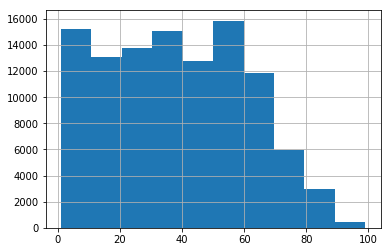

In [54]:
df.Age.hist(bins=10)

In [55]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [56]:
df.columns=['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show']

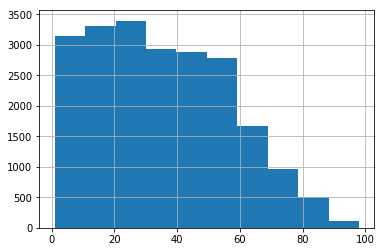

In [57]:
df[df.No_show=='Yes'].Age.hist(bins=10)

In [58]:
df['Gender'].replace('F',0,inplace=True) 
df['Gender'].replace('M',1,inplace=True)

In [59]:
df['No_show'].replace('No',0,inplace=True) 
df['No_show'].replace('Yes',1,inplace=True)

In [ ]:
replace_values = {'No' : 0, 'Yes' : 1}                                                                                          
df.replace({"No_show": replace_values},inplace=True) 

In [61]:
df.corr()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
PatientId,1.000000,0.004206,0.010470,-0.003009,-0.002168,-0.006205,0.001877,0.011364,-0.007832,-0.008501,-0.001046
AppointmentID,0.004206,1.000000,0.020572,-0.023521,0.022393,0.012098,0.022516,0.033167,0.013892,-0.254686,-0.161555
Gender,0.010470,0.020572,1.000000,-0.094037,-0.113696,-0.051317,-0.030038,0.110408,0.024949,-0.045851,-0.003206
Age,-0.003009,-0.023521,-0.094037,1.000000,-0.112649,0.502432,0.290864,0.090492,0.073135,0.005349,-0.067141
Scholarship,-0.002168,0.022393,-0.113696,-0.112649,1.000000,-0.024540,-0.027632,0.033521,-0.009790,-0.000021,0.029378
Hipertension,-0.006205,0.012098,-0.051317,0.502432,-0.024540,1.000000,0.430833,0.085456,0.078458,-0.008855,-0.037263
Diabetes,0.001877,0.022516,-0.030038,0.290864,-0.027632,0.430833,1.000000,0.016868,0.056526,-0.016145,-0.015924
Alcoholism,0.011364,0.033167,0.110408,0.090492,0.033521,0.085456,0.016868,1.000000,0.003918,-0.027410,-0.000513
Handcap,-0.007832,0.013892,0.024949,0.073135,-0.009790,0.078458,0.056526,0.003918,1.000000,-0.024949,-0.006646
SMS_received,-0.008501,-0.254686,-0.045851,0.005349,-0.000021,-0.008855,-0.016145,-0.027410,-0.024949,1.000000,0.127299


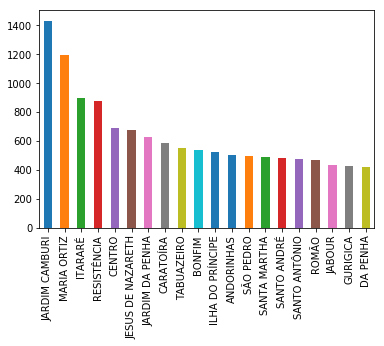

In [62]:
df[df.No_show==1].Neighbourhood.value_counts().sort_values(ascending=False)[0:20].plot(kind='bar')

In [49]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [63]:
df['PatientId']=df['PatientId'].astype(int)

In [64]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [65]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,1.069760e+05,1.069760e+05,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000,106976.000000
mean,1.472785e+14,5.675432e+06,0.344629,38.309004,0.101041,0.203784,0.074250,0.031409,0.022921,0.323278,0.202634
std,2.558181e+14,7.133383e+04,0.475249,22.456395,0.301385,0.402812,0.262179,0.174421,0.163960,0.467730,0.401964
min,3.921700e+04,5.030230e+06,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173120e+12,5.640488e+06,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171765e+13,5.680740e+06,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433654e+13,5.725632e+06,1.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [53]:
df.shape

(106976, 14)

In [57]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [66]:
df.dtypes

PatientId          int64
AppointmentID      int64
Gender             int64
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No_show            int64
dtype: object

In [64]:
type(df['ScheduledDay'][0])

str

In [67]:
df['week_day']=pandas.to_datetime(df['ScheduledDay']).dt.weekday_name

In [68]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,week_day
0,29872499824296,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,558997776694438,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,4262962299951,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,867951213174,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,8841186448183,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


In [ ]:
# {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
pandas.to_datetime(df['ScheduledDay']).dt.dayofweek

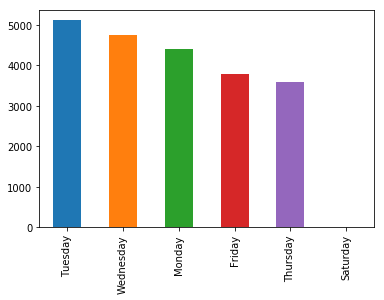

In [77]:
df['week_day'][df.No_show==1].value_counts().plot(kind='bar')